Import modules
---

In [1]:
from heliopy.data import ace
from heliopy.data import cdasrest
from heliopy.data import wind
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

In [15]:
from fig_params import figwidth, figdir, fontsize
import matplotlib
matplotlib.rcParams['font.size'] = fontsize

Import data
---

In [12]:
starttime = datetime(2000, 1, 1)
endtime = datetime(2011, 8, 1)
swih3 = ace.swi_h2(starttime, endtime)

starttime = datetime(2011, 8, 1)
endtime = datetime.now()
swih3b = ace.swi_h3b(starttime, endtime)

Compare pre and post re-configuration
---

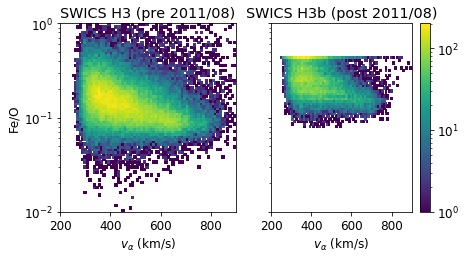

In [22]:
fontsize = 12

fig, axs = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(figwidth * 2, figwidth))
Abins = np.linspace(200, 900, 75)
Obins = np.logspace(-2, 0, 75)

ax = axs[0]
data = swih3.data.dropna(subset=('FetoO', 'vHe2'))
_, _, _, im = ax.hist2d(data['vHe2'], data['FetoO'], bins=(Abins, Obins), norm=mcolors.LogNorm());
ax.set_title('SWICS H3 (pre 2011/08)')
plt.colorbar(im)
ax.set_yscale('log')
ax.set_xlabel(r'$v_{\alpha}$ (km/s)', size=fontsize);
ax.set_ylabel('Fe/O', size=fontsize);

ax = axs[1]
data = swih3b.data.dropna(subset=('FetoO', 'vHe2'))
_, _, _, im = ax.hist2d(data['vHe2'], data['FetoO'], bins=(Abins, Obins), norm=mcolors.LogNorm());
ax.set_title('SWICS H3b (post 2011/08)')
ax.set_xlabel(r'$v_{\alpha}$ (km/s)', size=fontsize);

In [23]:
fig.savefig(f'{figdir}/ace_feo_comparison.pdf', bbox_inches='tight')

Calculate a corrected FetoO value
---

In [17]:
FeO_corrected = swih3b.quantity('FetoO')
FeO_corrected[FeO_corrected > 0.42] = np.nan
swih3b.data['FetoO_corrected'] = FeO_corrected

/Users/dstansby/miniconda3/envs/eis/lib/python3.8/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in greater
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [18]:
def speed_filter(data):
    keep = data['vHe2'] > 500
    return data.loc[keep, :]

/Users/dstansby/miniconda3/envs/eis/lib/python3.8/site-packages/numpy/lib/histograms.py:403: RuntimeWarning: invalid value encountered in greater_equal
  keep = (a >= first_edge)
/Users/dstansby/miniconda3/envs/eis/lib/python3.8/site-packages/numpy/lib/histograms.py:404: RuntimeWarning: invalid value encountered in less_equal
  keep &= (a <= last_edge)
/Users/dstansby/miniconda3/envs/eis/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/dstansby/miniconda3/envs/eis/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/dstansby/miniconda3/envs/eis/lib/python3.8/site-packages/numpy/lib/histograms.py:403: RuntimeWarning: invalid value encountered in greater_equal
  keep = (a >= first_edge)
/Users/dstansby/miniconda3/envs/eis/lib/python3.8/site-packages/numpy/lib/histograms.py:404: RuntimeWar

(0, 30)

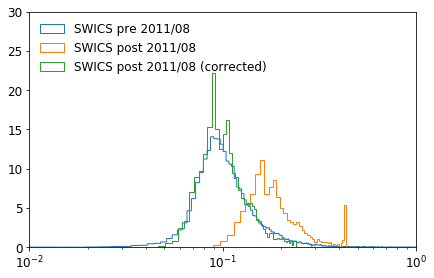

In [29]:
fig, ax = plt.subplots(figsize=(figwidth * 2, figwidth * 1.25))

filtered = speed_filter(swih3.data)
ax.hist(filtered['FetoO'], bins='auto', histtype='step', density=True, label='SWICS pre 2011/08')
    
filtered = speed_filter(swih3b.data)
ax.hist(filtered['FetoO'], bins='auto', histtype='step', density=True, label='SWICS post 2011/08')
    
filtered = speed_filter(swih3b.data) * 0.09 / 0.157
ax.hist(filtered['FetoO_corrected'], bins='auto', histtype='step', density=True, label='SWICS post 2011/08 (corrected)')

ax.legend(frameon=False, loc='upper left')
ax.set_xscale('log')
ax.set_xlim(1e-2, 1e0)
ax.set_ylim(0, 30)

In [32]:
fig.savefig(f'{figdir}/ace_feo_corrected.pdf', bbox_inches='tight')